a mail box file (with extension `.mbox`) contains emails stored as plain text. 

**Reading mbox file in python**

In [1]:
%matplotlib inline
import mailbox
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
mbox = mailbox.mbox('email1.mbox')
#for message in mbox:
    #print(message["date"])
    #print(message.items())
    # print(message['from']+" -->  "+message["to"])

### Analzying the file


In [24]:
def extractEmail(str):
    if str == None:
        str = "Unknown"
    parts = str.split("<")
    email = str
    if(len(parts)==2):
        email = parts[1][0:len(parts[1])-1]
    return email

def analyze(mboxfile,options={}) :
    mbox = mailbox.mbox(mboxfile)
    myEmail = options["myEmail"]
    vals = {}
    vals["total"] = {"sent":0,"recieved":0,"sum":0}
    vals["sendTo"] = {}
    vals["recievedFrom"] = {}
    for message in mbox:
        fromEmail = extractEmail(message["from"])
        toEmail= extractEmail(message["to"])
        if fromEmail==myEmail:
            # user has sent the email 
            vals["total"]["sent"]= vals["total"]["sent"]+1
            if toEmail not in vals["sendTo"] :
                vals["sendTo"][toEmail] = []
            info = message["date"]  
            vals["sendTo"][toEmail].append(info)
        else:
            # user has recieved the email
            vals["total"]["recieved"]= vals["total"]["recieved"]+1
            if fromEmail not in vals["recievedFrom"] :
                vals["recievedFrom"][fromEmail] = []
            info = message["date"]  
            vals["recievedFrom"][fromEmail].append(info)
    vals["total"]["sum"] = vals["total"]["sent"]+vals["total"]["recieved"]
    return vals

In [4]:
import data as userData 

In [27]:
stats = analyze(userData.fileName,{"myEmail":userData.myEmail})
# print(stats)

### Basic stats

In [35]:
print("Total Mails : ", stats["total"]["sum"])
print("   Mails sent : ", stats["total"]["sent"])
print("   Mails recieved : ", stats["total"]["recieved"])
print("Period :","TODO")
print("Average emails recieved in a day :","TODO")


Total Mails :  3991
   Mails sent :  68
   Mails recieved :  3923
Period : TODO
Average emails recieved in a day : TODO


### Visualizing the data

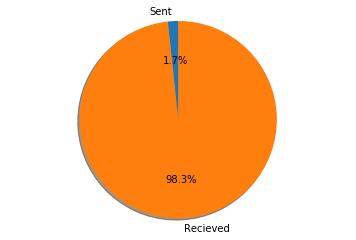

In [26]:
labels = 'Sent', 'Recieved'
sizes = [stats["total"]["sent"], stats["total"]["recieved"]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
# TODO  : time line chart of emails recieved and sent